In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Trader Data
trader_df = pd.read_csv('/content/drive/MyDrive/DS_Assignment/fear_greed_index.csv')

# Load Sentiment Data
sentiment_df = pd.read_csv('/content/drive/MyDrive/DS_Assignment/historical_data.csv')


In [ ]:
# Look at first 5 rows of each dataset
print("Trader Data:")
print(trader_df.head())

print("\nSentiment Data:")
print(sentiment_df.head())


Trader Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Sentiment Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1

In [ ]:
# Overview of data types and missing values
print("Trader Data Info:")
print(trader_df.info())

print("\nSentiment Data Info:")
print(sentiment_df.info())


Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null 

In [ ]:
print("Trader Data Columns:\n", trader_df.columns)
print("\nSentiment Data Columns:\n", sentiment_df.columns)


Trader Data Columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Sentiment Data Columns:
 Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp'],
      dtype='object')


In [ ]:
# For sentiment_df
sentiment_df.rename(columns={'Date': 'date', 'Classification': 'classification'}, inplace=True)

# For trader_df
trader_df.rename(columns={'time': 'time'}, inplace=True)


In [ ]:
# Clean column names just to be safe
trader_df.columns = trader_df.columns.str.strip().str.lower()
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()


In [ ]:
trader_df['date'] = pd.to_datetime(trader_df['timestamp']).dt.date



In [ ]:
trader_df['date'] = pd.to_datetime(trader_df['timestamp']).dt.date


In [ ]:
print(sentiment_df.columns)



Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp'],
      dtype='object')


In [ ]:
trader_df.columns = trader_df.columns.str.strip().str.lower()
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()


In [ ]:
# For trader_df → based on 'timestamp'
trader_df['date'] = pd.to_datetime(trader_df['timestamp']).dt.date

# For sentiment_df → also based on 'timestamp'
sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp']).dt.date


In [ ]:
sentiment_df.head()




,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,1970-01-01
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1970-01-01
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1970-01-01


In [ ]:
# Replace with correct file path and name
sentiment_df = pd.read_csv('/content/drive/MyDrive/DS_Assignment/fear_greed_index.csv')


In [ ]:
sentiment_df.head()
sentiment_df.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [ ]:
# Clean columns
trader_df.columns = trader_df.columns.str.strip().str.lower()
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()

# Create 'date' column from timestamp
trader_df['date'] = pd.to_datetime(trader_df['timestamp']).dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp']).dt.date

# Merge on 'date'
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')
merged_df.head()


,timestamp,value,classification_x,date,classification_y
0,1517463000,30,Fear,1970-01-01,Fear
1,1517463000,30,Fear,1970-01-01,Extreme Fear
2,1517463000,30,Fear,1970-01-01,Fear
3,1517463000,30,Fear,1970-01-01,Extreme Fear
4,1517463000,30,Fear,1970-01-01,Extreme Fear


In [ ]:
# Keep only classification_y and rename it to classification
merged_df = merged_df.drop(columns=['classification_x'])  # remove the wrong one
merged_df.rename(columns={'classification_y': 'classification'}, inplace=True)

# Confirm fix
print(merged_df.columns)
merged_df[['date', 'classification']].head()



Index(['timestamp', 'value', 'date', 'classification'], dtype='object')


,date,classification
0,1970-01-01,Fear
1,1970-01-01,Extreme Fear
2,1970-01-01,Fear
3,1970-01-01,Extreme Fear
4,1970-01-01,Extreme Fear


In [ ]:
print(merged_df.columns.tolist())



['timestamp', 'value', 'date', 'classification']


In [ ]:
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
trader_df['date'] = pd.to_datetime(trader_df['timestamp']).dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp']).dt.date


In [ ]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')


In [ ]:
print(merged_df.columns.tolist())


['timestamp', 'value', 'classification_x', 'date', 'classification_y']


In [ ]:
# Clean column names again
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Create 'date' columns from timestamps
trader_df['date'] = pd.to_datetime(trader_df['timestamp']).dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp']).dt.date

# ✅ Now correctly merge sentiment INTO trader data
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')


In [ ]:
print(merged_df.columns.tolist())


['timestamp', 'value', 'classification_x', 'date', 'classification_y']


In [ ]:
# Load both datasets again from Google Drive
trader_df = pd.read_csv('/content/drive/MyDrive/DS_Assignment/trader_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/DS_Assignment/fear_greed_data.csv')


In [ ]:
# Clean column names
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
# Convert timestamp to datetime and extract date
trader_df['date'] = pd.to_datetime(trader_df['timestamp']).dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [ ]:
# Merge only 'date' and 'classification' from sentiment_df into trader_df
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')


In [ ]:
print(merged_df.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date', 'classification']


In [ ]:
merged_df.groupby('classification')['closed_pnl'].mean()


,closed_pnl
classification,


In [ ]:
merged_df['closed_pnl'].dtype


dtype('float64')

In [ ]:
plot_df = merged_df.dropna(subset=['classification', 'closed_pnl'])


In [ ]:
print("Total rows in merged_df:", len(merged_df))
print("Rows with missing classification:", merged_df['classification'].isnull().sum())
print("Rows with missing closed_pnl:", merged_df['closed_pnl'].isnull().sum())

# Rows used for plotting
plot_df = merged_df.dropna(subset=['classification', 'closed_pnl'])
print("Rows after dropping missing values:", len(plot_df))


Total rows in merged_df: 211224
Rows with missing classification: 211224
Rows with missing closed_pnl: 0
Rows after dropping missing values: 0


In [ ]:
print("Trader dates:", trader_df['date'].min(), "to", trader_df['date'].max())
print("Sentiment dates:", sentiment_df['date'].min(), "to", sentiment_df['date'].max())


Trader dates: 1970-01-01 to 1970-01-01
Sentiment dates: 2018-02-01 to 2025-05-02


In [ ]:
trader_df['timestamp'].head()


,timestamp
0,1.730000e+12
1,1.730000e+12
2,1.730000e+12
3,1.730000e+12
4,1.730000e+12


In [ ]:
# Convert from milliseconds to datetime
trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'], unit='ms', errors='coerce')

# Extract date
trader_df['date'] = trader_df['timestamp'].dt.date


In [ ]:
print("Trader dates:", trader_df['date'].min(), "to", trader_df['date'].max())


Trader dates: 2023-03-28 to 2025-06-15


In [ ]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')


In [ ]:
plot_df = merged_df.dropna(subset=['closed_pnl', 'classification'])


In [ ]:
import os

# Create the outputs folder if it doesn't exist
os.makedirs('/content/drive/MyDrive/DS_Assignment/outputs', exist_ok=True)



In [ ]:
plt.savefig('/content/drive/MyDrive/DS_Assignment/outputs/profit_by_sentiment.png')


<Figure size 640x480 with 0 Axes>

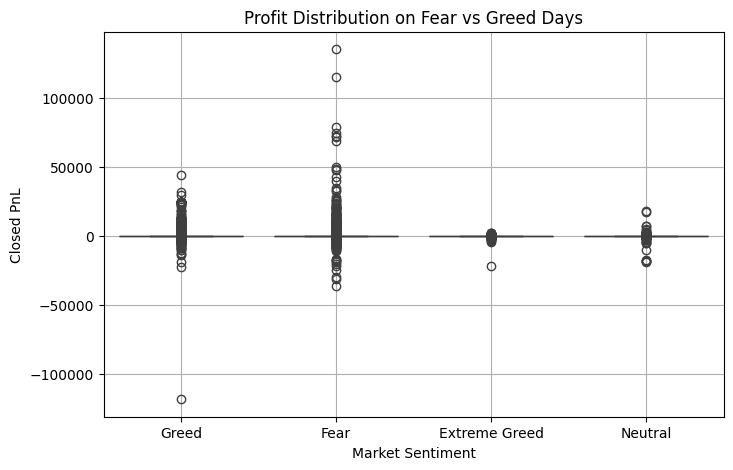

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure the output folder exists
os.makedirs('/content/drive/MyDrive/DS_Assignment/outputs', exist_ok=True)

# Clean plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=plot_df, x='classification', y='closed_pnl')
plt.title('Profit Distribution on Fear vs Greed Days')
plt.ylabel('Closed PnL')
plt.xlabel('Market Sentiment')
plt.grid(True)

# Save BEFORE showing
plt.savefig('/content/drive/MyDrive/DS_Assignment/outputs/profit_by_sentiment.png')

# Now show
plt.show()


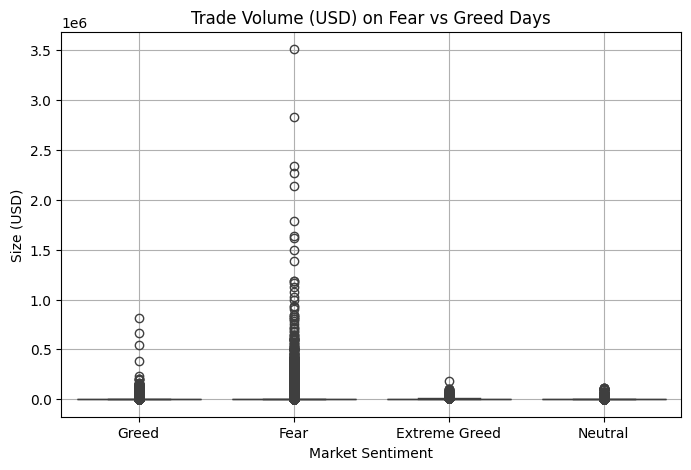

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the data is clean
plot_df = merged_df.dropna(subset=['size_usd', 'classification'])

# Create the output folder if not already done
import os
os.makedirs('/content/drive/MyDrive/DS_Assignment/outputs', exist_ok=True)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=plot_df, x='classification', y='size_usd')
plt.title('Trade Volume (USD) on Fear vs Greed Days')
plt.ylabel('Size (USD)')
plt.xlabel('Market Sentiment')
plt.grid(True)

# Save it
plt.savefig('/content/drive/MyDrive/DS_Assignment/outputs/volume_by_sentiment.png')
plt.show()
